In [6]:
import os
import pandas as pd
import collections
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# determined parameters
a = 78.4356
b = -267.1613

In [34]:
file_vec = []
file_vec_short = []
for root, dirs, files in os.walk(os.getcwd()):
    for file in files:
        if file.endswith(".csv"):
            current_way = os.path.join(root,file)
            current_file = os.path.join(file)[:-4]
            file_vec.append(current_way)
            file_vec_short.append(current_file)

In [38]:
len(file_vec_short)

196

In [39]:
water_mol = []
for file in file_vec:
    with open (file, 'r') as f:
        lines = f.readlines()[1:]
        water_mol.append(int(len(lines)/3))

In [40]:
water_mol = numpy.array(water_mol)
mean_water = int(np.mean(water_mol))
H_water_mean = round(b*mean_water,4)

entalpy_cor = []
for w in water_mol:
    if w == mean_water:
        entalpy_cor.append(H_water_mean)
    else:
        H_cur = round(H_water_mean + (w-mean_water)*(b+a/(w-mean_water)),4)
        entalpy_cor.append(H_cur)
#data = collections.Counter(water_mol)
#data.values()

In [64]:
entalpy_correction = pd.DataFrame({'Conformer': file_vec_short, 'N_water':water_mol, 'WC_Entalpy': entalpy_cor})
entalpy_correction.sort_values('Conformer', inplace = True)
entalpy_correction.to_csv('entalpy_correction.csv')

In [65]:
entalpy_correction

,Conformer,N_water,WC_Entalpy
0,conformer_0,63,-16752.7263
1,conformer_1,63,-16752.7263
2,conformer_10,62,-16485.5650
3,conformer_100,59,-15684.0811
4,conformer_101,58,-15495.3554
...,...,...,...
148,conformer_96,58,-15495.3554
149,conformer_97,59,-15684.0811
150,conformer_98,58,-15495.3554
151,conformer_99,57,-15149.7585


In [62]:
conf_tab = pd.read_csv('/media/greyfox21/TOSHIBA EXT/PhD/Solvation_models.prj/MOPAC/Glutathione_proto/Glutathione_proto_final_data.csv')
conf_tab['file'] = conf_tab['file'].apply(lambda x: x[:-4])
conf_tab.sort_values('file', inplace = True)

In [67]:
conf_tab.to_csv('Glutathione_proto_final_data2.csv')

In [66]:
for i in range(len(entalpy_correction['Conformer'])):
    if entalpy_correction['Conformer'][i] in conf_tab['file']:

        index = np.where(entalpy_correction['Conformer'][i] in conf_tab['file'])
        print(index)

conformer_0
conformer_1
conformer_10
conformer_100
conformer_101
conformer_102
conformer_103
conformer_104
conformer_105
conformer_106
conformer_107
conformer_109
conformer_110
conformer_111
conformer_112
conformer_113
conformer_114
conformer_115
conformer_116
conformer_117
conformer_118
conformer_192
conformer_193
conformer_194
conformer_195
conformer_196
conformer_197
conformer_198
conformer_2
conformer_20
conformer_21
conformer_22
conformer_23
conformer_24
conformer_25
conformer_26
conformer_28
conformer_29
conformer_3
conformer_5
conformer_50
conformer_51
conformer_52
conformer_53
conformer_54
conformer_55
conformer_56
conformer_57
conformer_58
conformer_59
conformer_6
conformer_60
conformer_61
conformer_62
conformer_63
conformer_64
conformer_65
conformer_66
conformer_67
conformer_68
conformer_69
conformer_7
conformer_70
conformer_71
conformer_72
conformer_73
conformer_74
conformer_75
conformer_76
conformer_77
conformer_78
conformer_142
conformer_143
conformer_144
conformer_145
con

(array([10., 46., 53., 35.,  0., 22., 18.,  8.,  4.,  1.]),
 array([56. , 56.8, 57.6, 58.4, 59.2, 60. , 60.8, 61.6, 62.4, 63.2, 64. ]),
 <a list of 10 Patch objects>)

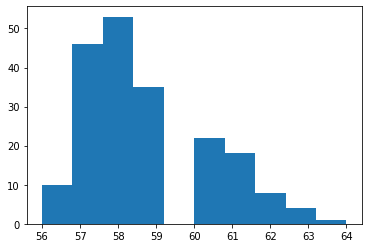

In [25]:
plt.hist(water_mol)